In [149]:
import boto3
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import io
import IPython
from IPython.display import display
import urllib.request

In [150]:
def getImageAsBytes(imageurl):
    imagedata = urllib.request.urlopen(imageurl).read()
    return imagedata 


In [151]:
def getLabels(imageurl):
    imageasbytes = getImageAsBytes(imageurl)
    
    client = boto3.client('rekognition')
    response = client.detect_labels(
        Image={'Bytes': imageasbytes},
        MaxLabels=100,
        MinConfidence=0.5
    )
    print(response)
    return response["Labels"]

In [152]:
def makeBoundingBoxes(image, labels, maxboxes=10):
    #image = Image(imageData)
    draw = ImageDraw.Draw(image) 
    imgWidth, imgHeight = image.size  
    for labelDetail in labels:
        print(labelDetail)
        
        labelname = labelDetail["Name"]
        labelconfidence = labelDetail["Confidence"]
        
        for instance in labelDetail["Instances"]:    
            box = instance['BoundingBox']
            left = imgWidth * box['Left']
            top = imgHeight * box['Top']
            width = imgWidth * box['Width']
            height = imgHeight * box['Height']
                
            #print('Left: ' + '{0:.0f}'.format(left))
            #print('Top: ' + '{0:.0f}'.format(top))
            #print('Face Width: ' + "{0:.0f}".format(width))
            #print('Face Height: ' + "{0:.0f}".format(height))
            points = (
                (left,top),
                (left + width, top),
                (left + width, top + height),
                (left , top + height),
                (left, top)

            )
            draw.line(points, fill='#00d400', width=2)  
    display(image)
    return image


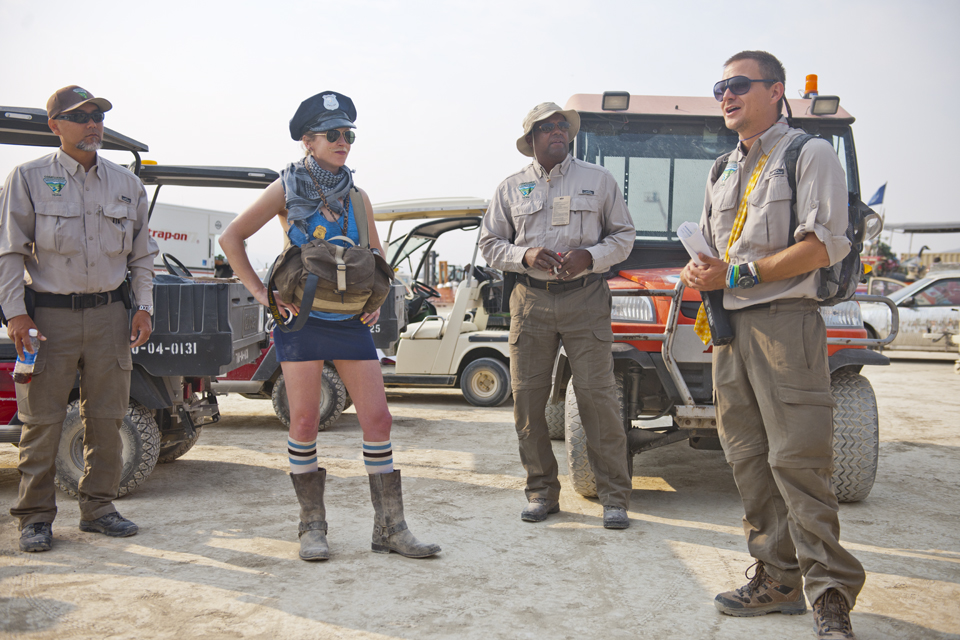

In [153]:
imageurl = "https://upload.wikimedia.org/wikipedia/commons/a/a0/Burning_Man_2013_Cargo_Cult_%289625733758%29_%283%29.jpg"
mydata = getImageAsBytes(imageurl)
display(IPython.display.Image(data=mydata))
stream = io.BytesIO(mydata)
img = Image.open(stream)

In [154]:
#labels = getLabels("https://raw.githubusercontent.com/dupled3031/AWS-AIML-examples/master/data/images/13.jpg")
labels = getLabels(imageurl)
print(json.dumps(labels))

{'Labels': [{'Name': 'Person', 'Confidence': 99.81132507324219, 'Instances': [{'BoundingBox': {'Width': 0.17138125002384186, 'Height': 0.6739296317100525, 'Left': 0.49893301725387573, 'Top': 0.15625357627868652}, 'Confidence': 99.81132507324219}, {'BoundingBox': {'Width': 0.16509541869163513, 'Height': 0.7224541306495667, 'Left': 0.00016558964853174984, 'Top': 0.1352788507938385}, 'Confidence': 99.76963806152344}, {'BoundingBox': {'Width': 0.18577219545841217, 'Height': 0.9012854695320129, 'Left': 0.710020124912262, 'Top': 0.0739724189043045}, 'Confidence': 99.67925262451172}, {'BoundingBox': {'Width': 0.2213248461484909, 'Height': 0.7456010580062866, 'Left': 0.2327934354543686, 'Top': 0.14211487770080566}, 'Confidence': 99.46951293945312}], 'Parents': []}, {'Name': 'Human', 'Confidence': 99.81132507324219, 'Instances': [], 'Parents': []}, {'Name': 'Clothing', 'Confidence': 99.5291748046875, 'Instances': [], 'Parents': []}, {'Name': 'Footwear', 'Confidence': 99.5291748046875, 'Instance

{'Name': 'Person', 'Confidence': 99.81132507324219, 'Instances': [{'BoundingBox': {'Width': 0.17138125002384186, 'Height': 0.6739296317100525, 'Left': 0.49893301725387573, 'Top': 0.15625357627868652}, 'Confidence': 99.81132507324219}, {'BoundingBox': {'Width': 0.16509541869163513, 'Height': 0.7224541306495667, 'Left': 0.00016558964853174984, 'Top': 0.1352788507938385}, 'Confidence': 99.76963806152344}, {'BoundingBox': {'Width': 0.18577219545841217, 'Height': 0.9012854695320129, 'Left': 0.710020124912262, 'Top': 0.0739724189043045}, 'Confidence': 99.67925262451172}, {'BoundingBox': {'Width': 0.2213248461484909, 'Height': 0.7456010580062866, 'Left': 0.2327934354543686, 'Top': 0.14211487770080566}, 'Confidence': 99.46951293945312}], 'Parents': []}
{'Name': 'Human', 'Confidence': 99.81132507324219, 'Instances': [], 'Parents': []}
{'Name': 'Clothing', 'Confidence': 99.5291748046875, 'Instances': [], 'Parents': []}
{'Name': 'Footwear', 'Confidence': 99.5291748046875, 'Instances': [], 'Parent

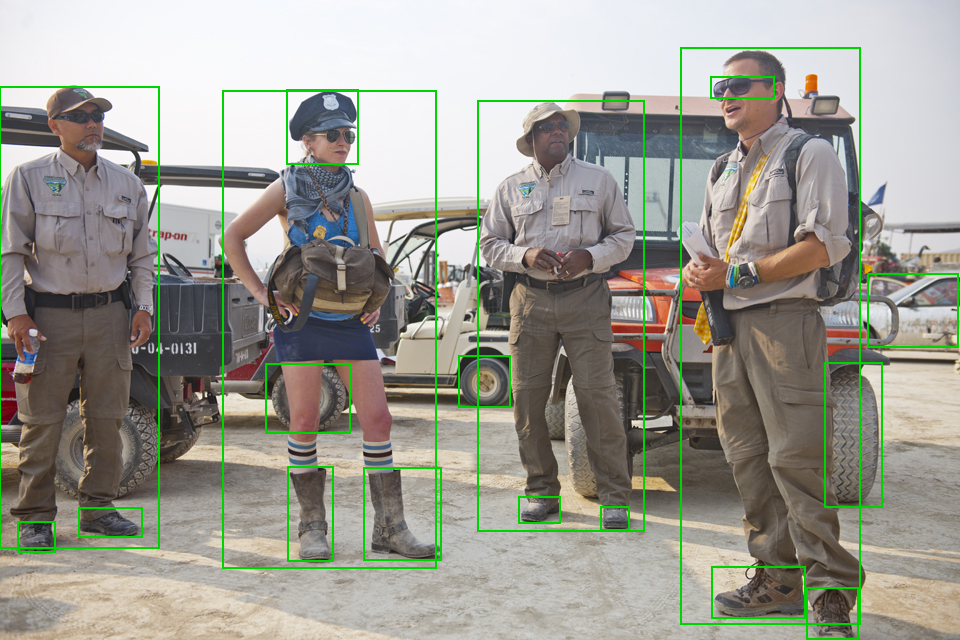

In [155]:
newimage = makeBoundingBoxes(img, labels, maxboxes=10)



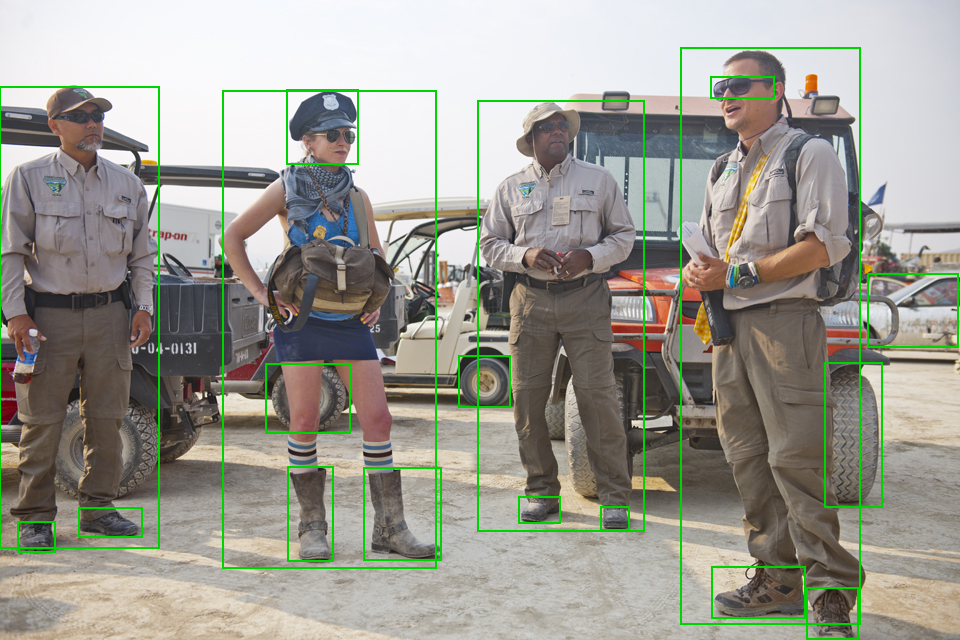

In [156]:
display(newimage)